<a href="https://colab.research.google.com/github/SrinivasMandla/Cognifyz-technologies-Data-Science/blob/main/Table_Booking_and_online_Deliveryipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LEVEL 2

**TASK 1**

***Table Booking and online Delivery***

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

In [ ]:
df1=pd.read_csv('/content/Dataset .csv')

In [ ]:
df1.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
df1['Cuisines'].fillna('not specified', inplace=True)

In [ ]:
df1.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

*determine the percentage of restaurents that offers table booking and online delivery*

In [ ]:
df1['Has Table booking'].value_counts()

,count
Has Table booking,
No,8393
Yes,1158


In [ ]:
df1["Has Online delivery"].value_counts()

,count
Has Online delivery,
No,7100
Yes,2451


In [ ]:
print("Table Booking : ", round((1158/8393+1158)*100,2),"%")
print("online Booking : ", round((2451/7100+2451)*100,2),"%")


Table Booking :  115813.8 %
online Booking :  245134.52 %


*compare the average ratings of restaurents with table booking and those without*

In [ ]:
df_with_table_booking = df1[df1['Has Table booking'] == 'Yes']
df_without_table_booking = df1[df1['Has Table booking'] == 'No']
print("Average rating of restaurents with table booking: ", round(df_with_table_booking['Aggregate rating'].mean(),2))
print("Average rating of restaurents without table booking: ", round(df_without_table_booking['Aggregate rating'].mean(),2))

Average rating of restaurents with table booking:  3.44
Average rating of restaurents without table booking:  2.56


*analyze the availability among restaurents with the differnt price ranges*

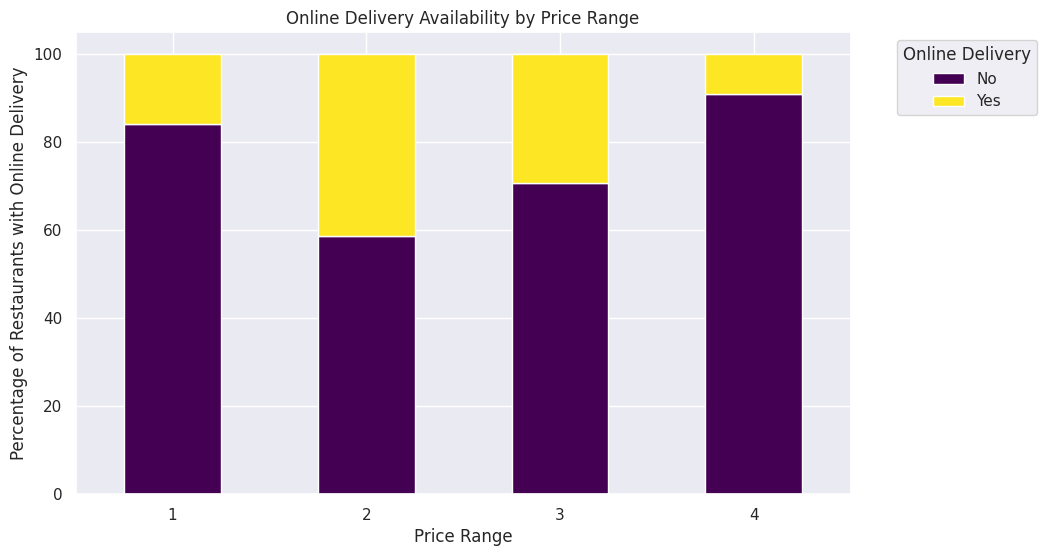

In [33]:
Online_Delivery_by_price_range = df1.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()*100
Online_Delivery_by_price_range.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Online Delivery Availability by Price Range")
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Online Delivery')
plt.xticks(rotation=0)
plt.legend(title='Online Delivery', bbox_to_anchor=(1.05, 1))
plt.show()


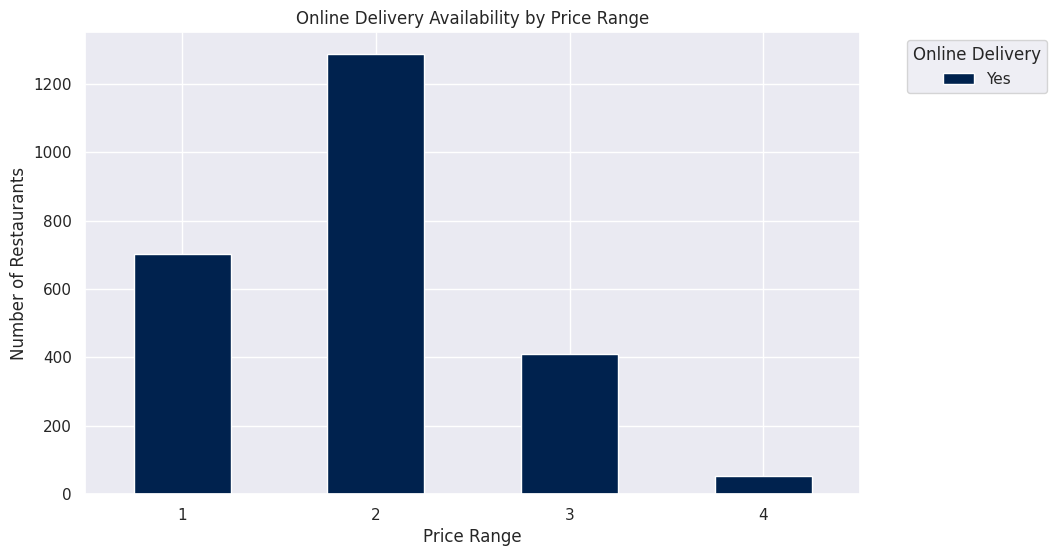

In [36]:

online_delivery_yes_df = df1[df1['Has Online delivery'] == 'Yes']


online_delivery_counts = online_delivery_yes_df.groupby(['Price range', 'Has Online delivery']).size().unstack()


online_delivery_counts.plot(kind='bar', stacked=True, colormap='cividis', figsize=(10, 6))
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.legend(title='Online Delivery', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

• From the above 1st graph we can see that most of the restaurant do not have the online delivery services. In price range 1 less than 20% are available, in price range 2 around 40% are availabe, In price range 3 it look like 30% are available and in price range 4 only 10% are available.


• From the above 2nd graph, we can analyze, people used to buy from the Price range 2 and very less number of people buy food from Price range 4 may be because of its costliest in price compare to others.